## G2M insight for Cab Investment firm
#### Submitted By : Richa Mishra

### Importing all the data sets:

In [194]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
cab_data = pd.read_csv("/Users/richa/Downloads/DataSets-main/Cab_Data.csv")
city_data = pd.read_csv("/Users/richa/Downloads/DataSets-main/City.csv")
cust_data=pd.read_csv("/Users/richa/Downloads/DataSets-main/Customer_ID.csv")
tran_data=pd.read_csv("/Users/richa/Downloads/DataSets-main/Transaction_ID.csv")
cab_data.shape


(359392, 7)

In [195]:
city_data.shape

(20, 3)

In [196]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [197]:
city_data.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [198]:
from datetime import datetime, timedelta
def to_date_format(n):
    date_str =(datetime(1899,12,30) + timedelta(n-1)).strftime("%d-%m-%Y")
    date_date =  datetime.strptime(date_str, "%d-%m-%Y")
    return date_date

In [199]:
cab_data['Date of Travel'] = cab_data['Date of Travel'].apply(lambda x:to_date_format(x))

In [200]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [201]:
cab_data['month'] = pd.DatetimeIndex(cab_data['Date of Travel']).month

In [202]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,month
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635,1
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854,1
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,1
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602,1
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.776,1


In [203]:
profit= cab_data['Price Charged']-cab_data['Cost of Trip']
profit.head()
cab_data['Profit']=profit

<AxesSubplot: xlabel='Profit', ylabel='City'>

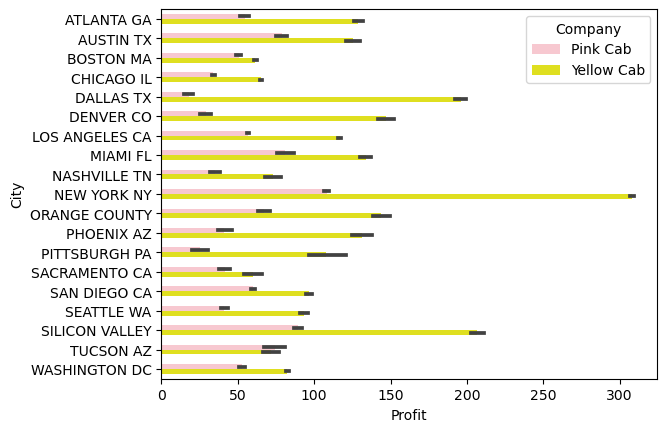

In [204]:

sns.barplot(x = 'Profit',
            y = 'City',
            hue = 'Company',
            width=0.5,
            palette = ['pink', 'yellow'],
            data = cab_data,orient = 'h')

<AxesSubplot: xlabel='month'>

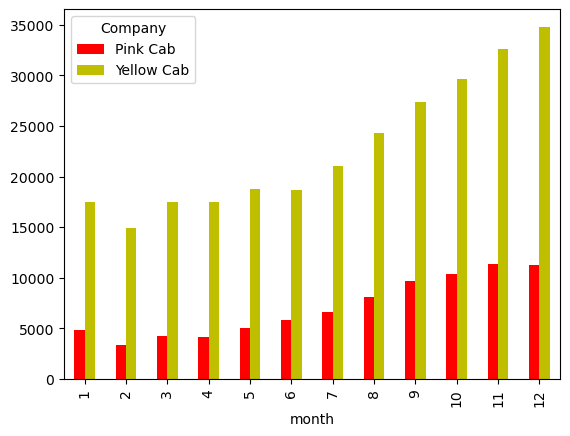

In [205]:
import seaborn as sns
import matplotlib.pyplot as plt
cab_data.groupby(by=['month','Company'])['Transaction ID'].count().unstack().plot(kind="bar",color=['r','y'])


<AxesSubplot: xlabel='KM Travelled', ylabel='Price Charged'>

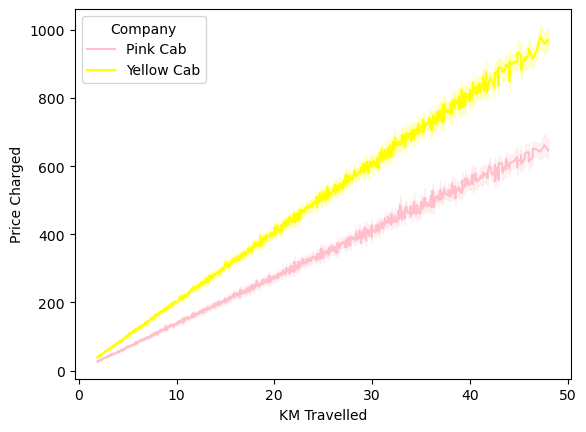

In [206]:
sns.lineplot(x = 'KM Travelled',
            y = 'Price Charged',
            hue = 'Company',
            palette = ['pink', 'yellow'],
            data = cab_data)

<AxesSubplot: xlabel='Gender', ylabel='Customer ID'>

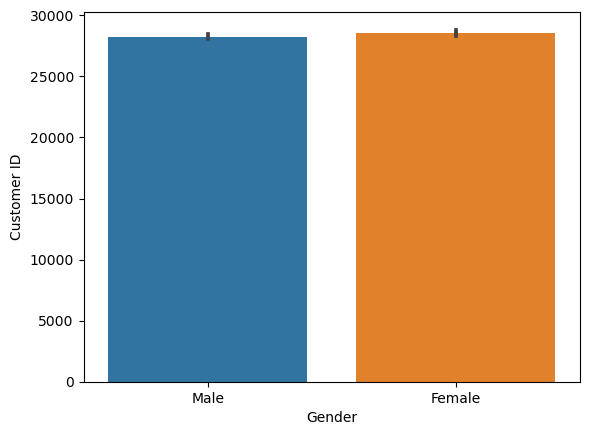

In [207]:
sns.barplot(x = 'Gender',
            y = 'Customer ID',
            data = cust_data)

In [208]:
def checkAgeRange(age):
    las_dig=age%10
    range_age=str.format('{0}-{1}',age-las_dig,((age-las_dig)+10))
    return range_age

In [209]:
dataFrame= pd.DataFrame(data=cust_data)
dataFrame['AgeGroup']=dataFrame['Age'].apply(checkAgeRange)
print(dataFrame)

       Customer ID  Gender  Age  Income (USD/Month) AgeGroup
0            29290    Male   28               10813    20-30
1            27703    Male   27                9237    20-30
2            28712    Male   53               11242    50-60
3            28020    Male   23               23327    20-30
4            27182    Male   33                8536    30-40
...            ...     ...  ...                 ...      ...
49166        12490    Male   33               18713    30-40
49167        14971    Male   30               15346    30-40
49168        41414    Male   38                3960    30-40
49169        41677    Male   23               19454    20-30
49170        39761  Female   32               10128    30-40

[49171 rows x 5 columns]


<AxesSubplot: xlabel='AgeGroup', ylabel='Customer ID'>

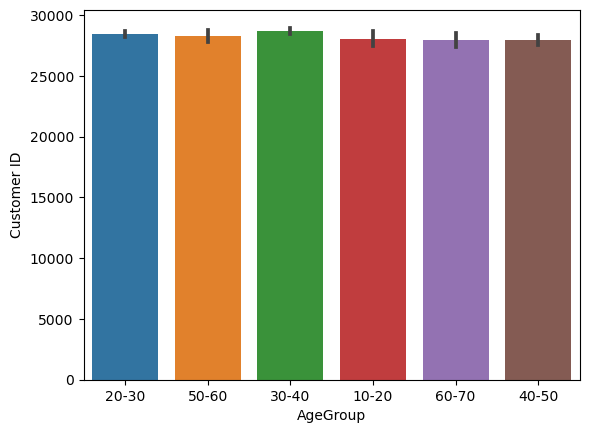

In [210]:
sns.barplot(x = 'AgeGroup',
            y = 'Customer ID',
            data = dataFrame)

In [211]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,month,Profit
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635,1,57.315
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854,1,23.666
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,1,27.568
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602,1,25.798
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.776,1,16.844


### Created Master Data by doing a left join on tables

In [212]:
data1=pd.merge(cab_data,tran_data,on='Transaction ID',how='left')
data1.shape

(359392, 11)

In [213]:
data1.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,month,Profit,Customer ID,Payment_Mode
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635,1,57.315,29290,Card
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854,1,23.666,27703,Card
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,1,27.568,28712,Cash
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602,1,25.798,28020,Cash
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.776,1,16.844,27182,Card


In [214]:
master_data=pd.merge(data1,cust_data,on='Customer ID',how='left')
master_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,month,Profit,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),AgeGroup
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635,1,57.315,29290,Card,Male,28,10813,20-30
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854,1,23.666,27703,Card,Male,27,9237,20-30
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,1,27.568,28712,Cash,Male,53,11242,50-60
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602,1,25.798,28020,Cash,Male,23,23327,20-30
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.776,1,16.844,27182,Card,Male,33,8536,30-40


## No null value found after Creation of Master Data

In [215]:
master_data.isna().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
month                 0
Profit                0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
AgeGroup              0
dtype: int64

<AxesSubplot: xlabel='Gender', ylabel='Customer ID'>

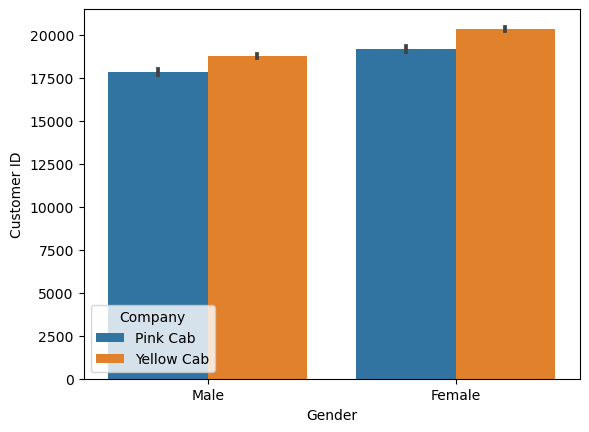

In [216]:
sns.barplot(x = 'Gender',
            y = 'Customer ID',
            hue='Company',
            data = master_data)

In [217]:
master_data['year'] = pd.DatetimeIndex(master_data['Date of Travel']).year

In [218]:
master_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,month,Profit,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),AgeGroup,year
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635,1,57.315,29290,Card,Male,28,10813,20-30,2016
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854,1,23.666,27703,Card,Male,27,9237,20-30,2016
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,1,27.568,28712,Cash,Male,53,11242,50-60,2016
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602,1,25.798,28020,Cash,Male,23,23327,20-30,2016
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.776,1,16.844,27182,Card,Male,33,8536,30-40,2016


In [220]:
pink1 = master_data[(master_data.Company=='Pink Cab')&(master_data.City=='DALLAS TX')].groupby(['year','month']).Profit.mean()
yellow1 = master_data[(master_data.Company=='Yellow Cab')&(master_data.City=='DALLAS TX')].groupby(['year','month']).Profit.mean()
pink2 = pd.DataFrame({'Profit_pink':pink1.values,'Transactions_pink':master_data[master_data.Company=='Pink Cab'].groupby(['year','month'])['Transaction ID'].count().values})
yellow2 = pd.DataFrame({'Profit_yellow':yellow1.values,'Transactions_yellow':master_data[master_data.Company=='Yellow Cab'].groupby(['year','month'])['Transaction ID'].count().values})

<AxesSubplot: xlabel='Transactions_pink', ylabel='Profit_pink'>

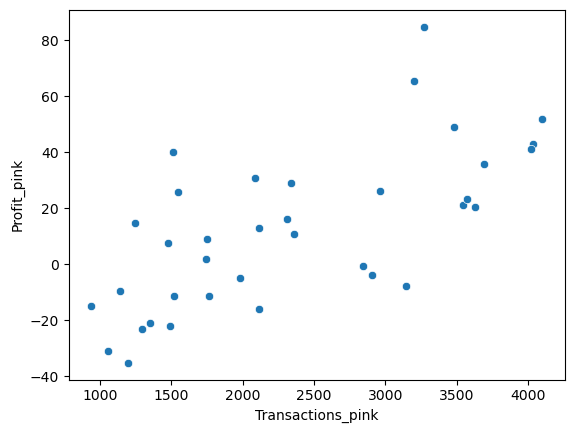

In [221]:
sns.scatterplot(x = 'Transactions_pink',
            y = 'Profit_pink',
            data = pink2)

## We can see that it is slightly positively correlated. 
## Increase in transaction increases the profit for PINK CAB

In [222]:
pink2.corr()

,Profit_pink,Transactions_pink
Profit_pink,1.000000,0.678774
Transactions_pink,0.678774,1.000000


<AxesSubplot: xlabel='Transactions_yellow', ylabel='Profit_yellow'>

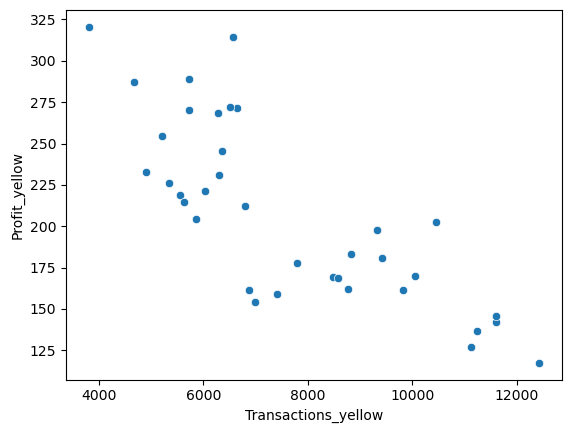

In [223]:
sns.scatterplot(x = 'Transactions_yellow',
            y = 'Profit_yellow',
            data = yellow2)

## We can see that it is slightly negatively correlated. 
## Increase in transaction decreases the profit for YELLOW CAB

In [224]:
yellow2.corr()

,Profit_yellow,Transactions_yellow
Profit_yellow,1.000000,-0.791308
Transactions_yellow,-0.791308,1.000000


## Null Hypothesis : There is no Difference in profit of Pink Cab in comparison to male and female Users

In [225]:
Female = master_data[(master_data.Gender=='Female')&(master_data.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
Male = master_data[(master_data.Gender=='Male')&(master_data.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
print(Female.shape[0],Male.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(Female.values,b=Male.values,equal_var=True)
if(p_value<0.05):
    print('We do not accept null hypothesis')
else:
    print('We accept null hypothesis')
    
print('P value is ', p_value)

37480 47231
We accept null hypothesis
P value is  0.11515305900425803


## Null Hypothesis : There is no Difference in profit of Yellow Cab in comparison to male and female Users

In [226]:
Female_y = master_data[(master_data.Gender=='Female')&(master_data.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
Male_y = master_data[(master_data.Gender=='Male')&(master_data.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
print(Female.shape[0],Male.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(Female_y.values,b=Male_y.values,equal_var=True)
if(p_value<0.05):
    print('We do not accept null hypothesis')
else:
    print('We accept null hypothesis')
    
print('P value is ', p_value)

37480 47231
We do not accept null hypothesis
P value is  6.060473042494056e-25


In [227]:
master_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,month,Profit,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),AgeGroup,year
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635,1,57.315,29290,Card,Male,28,10813,20-30,2016
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854,1,23.666,27703,Card,Male,27,9237,20-30,2016
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,1,27.568,28712,Cash,Male,53,11242,50-60,2016
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602,1,25.798,28020,Cash,Male,23,23327,20-30,2016
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.776,1,16.844,27182,Card,Male,33,8536,30-40,2016


In [228]:
master_data.to_csv('master_data.csv',index = False)